## Лабораторная работа №9 (Пономарева А.Ю., группа БПМ-151)
### Вариант 23

In [1]:
import numpy as np
from sympy import *
import math
from sympy.plotting import plot
import time
from tqdm import tqdm_notebook

%matplotlib inline

### Задача 9.1

Методом Ньютона найти минимум и максимум унимодальной на отрезке $[a, \;b]$ функции $f(x)$ с точностью $\varepsilon=10^{-6}$. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.

$$\boldsymbol{f(x)} = x^{3}-e^x$$
$$\boldsymbol{a}=-1\;\;\;\boldsymbol{b}=0$$

Зададим функцию, реализующую поиск экстремума.<br/>
Итерационнай шаг преобразован с использованием второй производной, т.е. мы просто пользуемся поиском корня производной методом Ньютона.

Метод Ньютона

## $ x^{(n)} = x^{(n-1)} - \frac {f'(x^{(n-1)}}{f''(x^{(n-1)}}  $

In [22]:
def newton(xstart, fun, eps, a, b):
    pbar = tqdm_notebook(total = 100) # будем считать итерации
    x0 = xstart
    xi = x0 - diff(fun, x).evalf(subs={x:x0})/diff(diff(fun, x),x).evalf(subs={x:x0}) # символьное дифференцирование 
                                                                                      # и вычисление функции в точке
    while abs(xi - x0) > eps:
        pbar.update(1) # добавляем итерацию
        x0 = xi
        xi = x0 - diff(fun, x).evalf(subs={x:x0})/diff(diff(fun, x), x).evalf(subs={x:x0})
    return float(xi)

In [3]:
x = Symbol('x')
f1 = x**3 - exp(x) #для символьного дифференцирования в методе Ньютона
a = -1
b = 0
eps = 1e-6

Графики функции и ее первой производной. Видим, что корень близок к $-0.4$ и производная монотонно убывает.

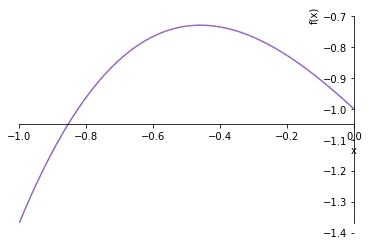

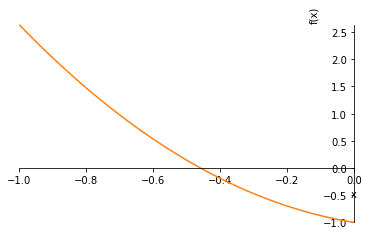

In [25]:
plot(f1, (x, -1, 0), line_color='tab:purple')
plot(diff(f1, x), (x, -1, 0), line_color='tab:orange')

Судя по графику, итерации в методе Ньютона лучше начинать с точки $-0.4$.

In [26]:
newton(-0.4, f1, eps, -1, 0)

HBox(children=(IntProgress(value=0), HTML(value='')))

-0.4589622675369485

получили локальный максимум = -0.4589622

По графику видно, что локальный минимум функции ${f(x)} = x^{3}-e^x$ на отрезке $[-1,\;0]$ достигается в точке $-1$. Но мы не можем найти эту точку при помощи метода Ньютона, т.к. в ней не меняется знак производной (второй график).

### Задача 9.2
Методом Фибоначчи найти минимумы и максимумы функции $f(x)$ на отрезке $[x_1,\;x_2]$ с точностью $\varepsilon=10^{-6}$. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.
$$\cos(e^{t})$$
$$x_1=1\;\;\;x_2=2$$

Метод Фибоначчи

### $ \alpha = a^{(k)} + \frac{F_{N-K-1}}{F_{N-K+1}} \Delta ^{(k)}$

### $ \beta = b^{(k)} + \frac{F_{N-K}}{F_{N-K+1}} \Delta ^{(k)}$

Критерий окончания

$ \Delta ^{(N-1)} = \frac {2\Delta}{F_{N+1}} < \varepsilon $

In [27]:
def fib_bine(n): # функция для вычисления чисел Фибоначчи по формуле Бине
    return int(np.round((math.pow((1+math.pow(5, 0.5))/2, n) - math.pow((1-math.pow(5, 0.5))/2, n))/math.pow(5, 0.5)))

In [17]:
def fib(fun, eps, a0 = 0, b0 = 1):
    pbar = tqdm_notebook(total=100) # подсчет итераций
    N=0
    a = a0
    b = b0
    delta = b0 - a0
    while(delta/fib_bine(N+1)>=eps): # выясним, сколько нужно сделать итераций
        N +=1   
    for k in range(N):
        pbar.update(1) # добавляем итерацию
        alpha = a + (b-a)*fib_bine(N-k-2)/fib_bine(N-k)
        beta = a + (b-a)*fib_bine(N-k-1)/fib_bine(N-k)
        if fun.evalf(subs={t:alpha}) <= fun.evalf(subs={t:beta}):
            b = beta
        else:
            a = alpha
    return (a+b)/2

Зададим функцию $f(t)$ и значения $x_1, x_2$

In [18]:
t = Symbol('t')
f2 = cos(exp(t))
x1 = 1
x2 = 2

График функции $f(t) = \cos(e^{t})$:

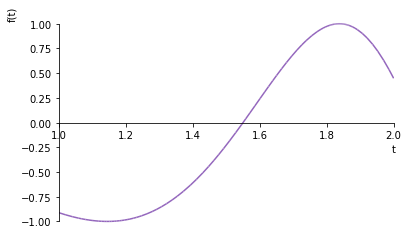

In [19]:
plot(f2, (t, 1, 2), axis_center=(1,0), line_color='tab:purple')

Найдём минимум функции $f(t)$ на отрезке $[1,\;2]$.

In [20]:
fib(f2, eps, a0=1, b0=2)

HBox(children=(IntProgress(value=0), HTML(value='')))

1.1447286188164028

Найдём максимум (минимум $-f(t)$) функции $f(t)$ на отрезке $[1,\;2]$.

In [21]:
fib(-f2, eps, a0=1, b0=2)

HBox(children=(IntProgress(value=0), HTML(value='')))

1.8378755829046685